# PLANT DISEASE CLASSIFICATION USING RESNET

In [6]:
!pip install torchvision

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
    --------------------------------------- 0.0/1.2 MB 330.3 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.2 MB 660.6 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.2 MB 762.6 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.2 MB 731.4 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.2 MB 774.0 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.2 MB 766.6 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.2 MB 766.6 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.2 MB 766.6 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.2 MB 525.1 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.2 MB 530.7 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.2 MB 518.8 kB/s eta 0:00:02
   ------- -------------------------------- 0.2/1.2 MB 509.6 kB/s eta 0:0


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
# from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

# EDA

Loading the data 

In [13]:
data_dir = r"C:\Users\hp\Downloads\combined_dataset"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [4]:
# printing the disease names
print(diseases)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [8]:
# Load combined dataset
train_dataset = ImageFolder(train_dir)
valid_dataset = ImageFolder(valid_dir)

# Extract class names
class_names = train_dataset.classes
print(f"Total number of unique diseases: {len(class_names)}")

# Function to extract plant names from class names
def extract_plant_names(class_names):
    plant_names = set()
    for name in class_names:
        plant = name.split("___")[0]  # Assuming the format is 'Plant___Disease'
        plant_names.add(plant)
    return plant_names

# Get unique plant names
unique_plants = extract_plant_names(class_names)
print(f"Total number of unique plants: {len(unique_plants)}")

# Display the unique plant names and unique diseases
print(f"Unique plants: {unique_plants}")
print(f"Unique diseases: {class_names}")

Total number of unique diseases: 41
Total number of unique plants: 17
Unique plants: {'Apple', 'Cherry_(including_sour)', 'Pepper,_bell', 'Raspberry', 'Squash', 'Blueberry', 'Wheat_Yellow_rust', 'Grape', 'Corn_(maize)', 'Orange', 'Tomato', 'Wheat_Brown_rust', 'Wheat_Healthy', 'Soybean', 'Potato', 'Peach', 'Strawberry'}
Unique diseases: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'P

The above cell extract the number of unique plants and number of unique diseases

So we have images of leaves of 14 plants and while excluding healthy leaves, we have 26 types of images that show a particular disease in a particular plant.

In [9]:
import os
import pandas as pd

def count_images_in_folders(base_dir):
    disease_counts = {}
    for disease in os.listdir(base_dir):
        disease_dir = os.path.join(base_dir, disease)
        if os.path.isdir(disease_dir):
            num_images = len([file for file in os.listdir(disease_dir) if os.path.isfile(os.path.join(disease_dir, file))])
            disease_counts[disease] = num_images
    return disease_counts


# Count images in the training and validation directories
train_counts = count_images_in_folders(train_dir)
valid_counts = count_images_in_folders(valid_dir)

# Combine counts from training and validation directories
total_counts = {disease: train_counts.get(disease, 0) + valid_counts.get(disease, 0) for disease in set(train_counts) | set(valid_counts)}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(list(total_counts.items()), columns=['Disease', 'Number of Images'])
df.set_index('Disease', inplace=True)

# Print the DataFrame
print(df)

# Optionally, save the DataFrame to a CSV file
df.to_csv('disease_image_counts.csv')


                                                    Number of Images
Disease                                                             
Apple___Cedar_apple_rust                                        2200
Wheat_Yellow_rust                                               1156
Tomato___healthy                                                2407
Peach___Bacterial_spot                                          2297
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot              2052
Apple___Apple_scab                                              2520
Pepper,_bell___Bacterial_spot                                   2391
Tomato___Tomato_mosaic_virus                                    2238
Cherry_(including_sour)___Powdery_mildew                        2104
Wheat_Healthy                                                   1395
Wheat_Brown_rust                                                1128
Tomato___Spider_mites Two-spotted_spider_mite                   2176
Grape___Esca_(Black_Measles)      

#### Visualizing the above information on a graph

C:\Users\hp\AppData\Local\Temp\ipykernel_12708\2150091952.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['Number of Images'], palette='viridis')


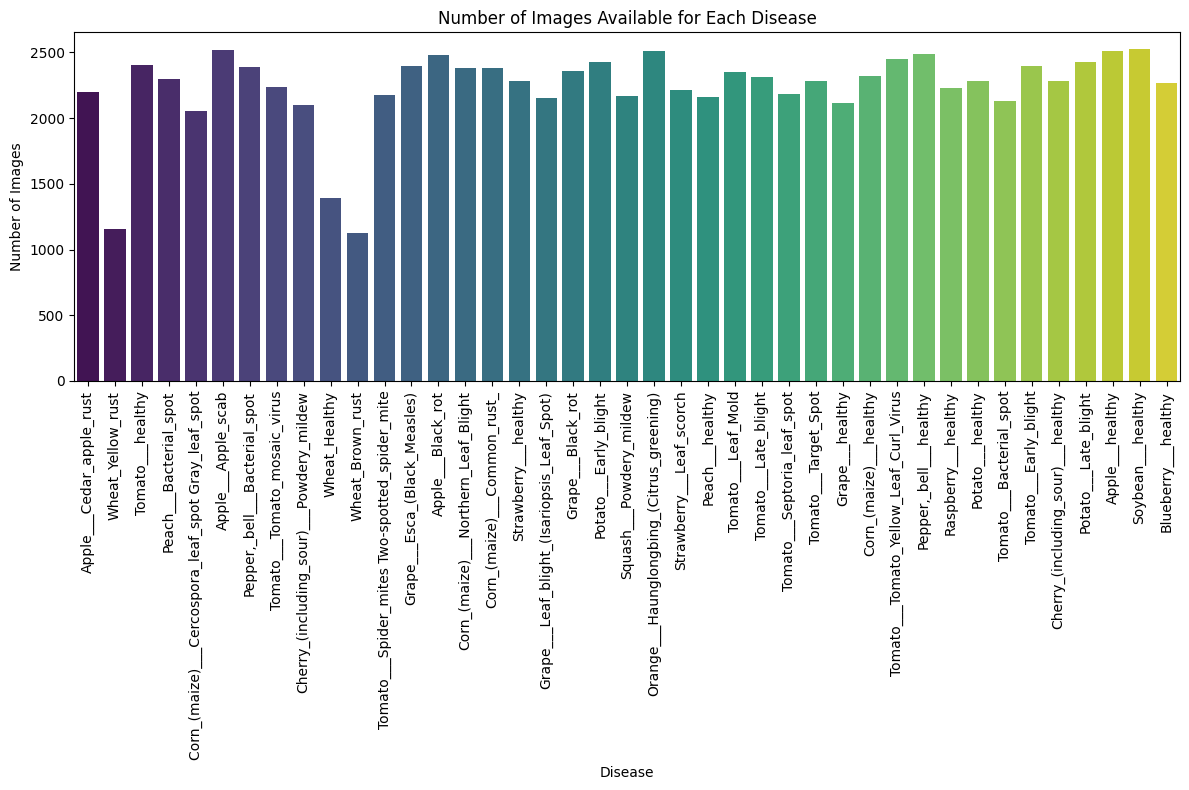

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the number of images for each disease
def plot_image_counts(df):
    plt.figure(figsize=(12, 8))
    
    # Using Seaborn for a better visual style
    sns.barplot(x=df.index, y=df['Number of Images'], palette='viridis')
    
    # Adding labels and title
    plt.xlabel('Disease')
    plt.ylabel('Number of Images')
    plt.title('Number of Images Available for Each Disease')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    
    # Show plot
    plt.tight_layout()
    plt.show()

# Assuming df is the DataFrame created earlier
plot_image_counts(df)


We can see that the dataset is almost balanced for all classes, so we are good to go forward

#### Images available for training

In [14]:
import os

def count_images_in_dataset(base_dir):
    total_images = 0
    for label in os.listdir(base_dir):
        label_dir = os.path.join(base_dir, label)
        if os.path.isdir(label_dir):
            num_images = len([file for file in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, file))])
            total_images += num_images
    return total_images



# Get the total number of images in the training dataset
total_train_images = count_images_in_dataset(train_dir)
print(f"Total images available for training: {total_train_images}")


Total images available for training: 73237


# 🍳 Data Preparation for training 🍳

In [15]:
from PIL import Image, ImageOps
import os

def make_image_square(image_path, output_path, target_size=256):
    with Image.open(image_path) as img:
        # Calculate the size of the new image
        old_size = img.size
        ratio = float(target_size) / max(old_size)
        new_size = tuple([int(x * ratio) for x in old_size])

        # Resize the image with the new size
        img = img.resize(new_size, Image.ANTIALIAS)

        # Create a new image with a white background
        new_img = Image.new("RGB", (target_size, target_size), (255, 255, 255))
        new_img.paste(img, ((target_size - new_size[0]) // 2,
                            (target_size - new_size[1]) // 2))

        # Save the square image
        new_img.save(output_path)

def process_images(input_dir, output_dir, target_size=256):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for folder_name in os.listdir(input_dir):
        folder_path = os.path.join(input_dir, folder_name)
        output_folder_path = os.path.join(output_dir, folder_name)
        
        if not os.path.exists(output_folder_path):
            os.makedirs(output_folder_path)
        
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            output_path = os.path.join(output_folder_path, image_name)
            
            make_image_square(image_path, output_path, target_size)

# Define directories
input_train_dir = r"C:\Users\hp\Downloads\combined_dataset\train"
output_train_dir = r"C:\Users\hp\Downloads\combined_dataset\train_squared"

# Process the images to make them square
process_images(input_train_dir, output_train_dir, target_size=256)


C:\Users\hp\AppData\Local\Temp\ipykernel_12708\1524408567.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(new_size, Image.ANTIALIAS)


In [16]:
# datasets for validation and training
train = ImageFolder(r"C:\Users\hp\Downloads\combined_dataset\train_squared", transform=transforms.ToTensor())
valid = ImageFolder(r"C:\Users\hp\Downloads\combined_dataset\valid", transform=transforms.ToTensor()) 

`torchvision.datasets` is a class which helps in loading all common and famous datasets. It also helps in loading custom datasets. I have used subclass `torchvision.datasets.ImageFolder` which helps in loading the image data when the data is arranged in this way:

----------------
root/dog/xxx.png

root/dog/xxy.png

root/dog/xxz.png

<br>

root/cat/123.png

root/cat/nsdf3.png

root/cat/asd932_.png

----------------

Next, after loading the data, we need to transform the pixel values of each image (0-255) to 0-1 as neural networks works quite good with normalized data. The entire array of pixel values is converted to torch [tensor](https://pytorch.org/tutorials/beginner/examples_tensor/two_layer_net_tensor.html#:~:text=A%20PyTorch%20Tensor%20is%20basically,used%20for%20arbitrary%20numeric%20computation.) and then divided by 255.
If you are not familiar why normalizing inputs help neural network, read [this](https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d) post.

#### Image shape 

In [17]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


We can see the shape (3, 256 256) of the image. 3 is the number of channels (RGB) and 256 x 256 is the width and height of the image

In [19]:
# total number of classes in train set
len(train.classes)

41

In [20]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

## 🖼️ Some Images from training dataset 🖼️

Label :Apple___Apple_scab(0)


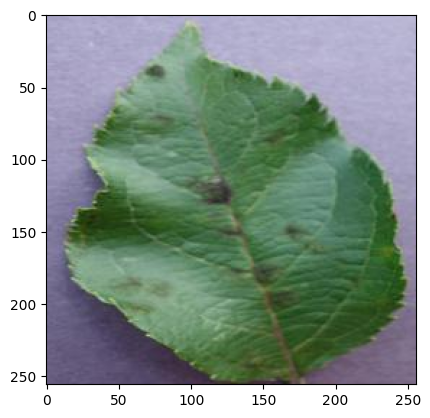

In [21]:
show_image(*train[0])

Label :Tomato___healthy(37)


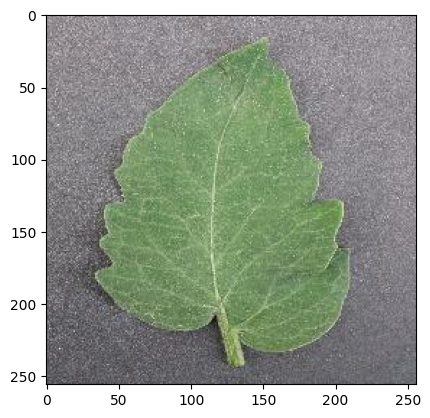

In [22]:
show_image(*train[70000])

Label :Wheat_Healthy(39)


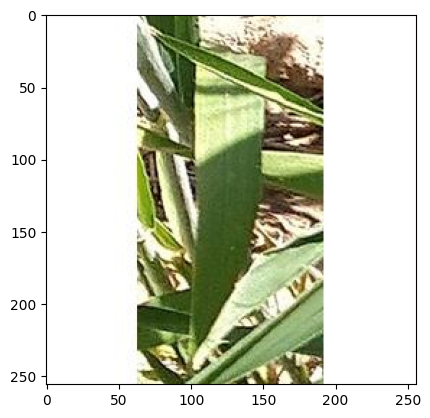

In [23]:
show_image(*train[72000])

In [24]:
# Setting the seed value
random_seed = 7
torch.manual_seed(random_seed)

In [25]:
# setting the batch size
batch_size = 32

`batch_size` is the total number of images given as input at once in forward propagation of the CNN. Basically, batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network.

In [26]:
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

- `DataLoader` is a subclass which comes from `torch.utils.data`. It helps in loading large and memory consuming datasets. It takes in `batch_size` which denotes the number of samples contained in each generated batch. 

- Setting `shuffle=True` shuffles the dataset. It is heplful so that batches between epochs do not look alike. Doing so will eventually make our model more robust.

- `num_workers`, denotes the number of processes that generate batches in parallel. If you have more cores in your CPU, you can set it to number of cores in your CPU. Since, Kaggle provides a 2 core CPU, I have set it to 2


In [27]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

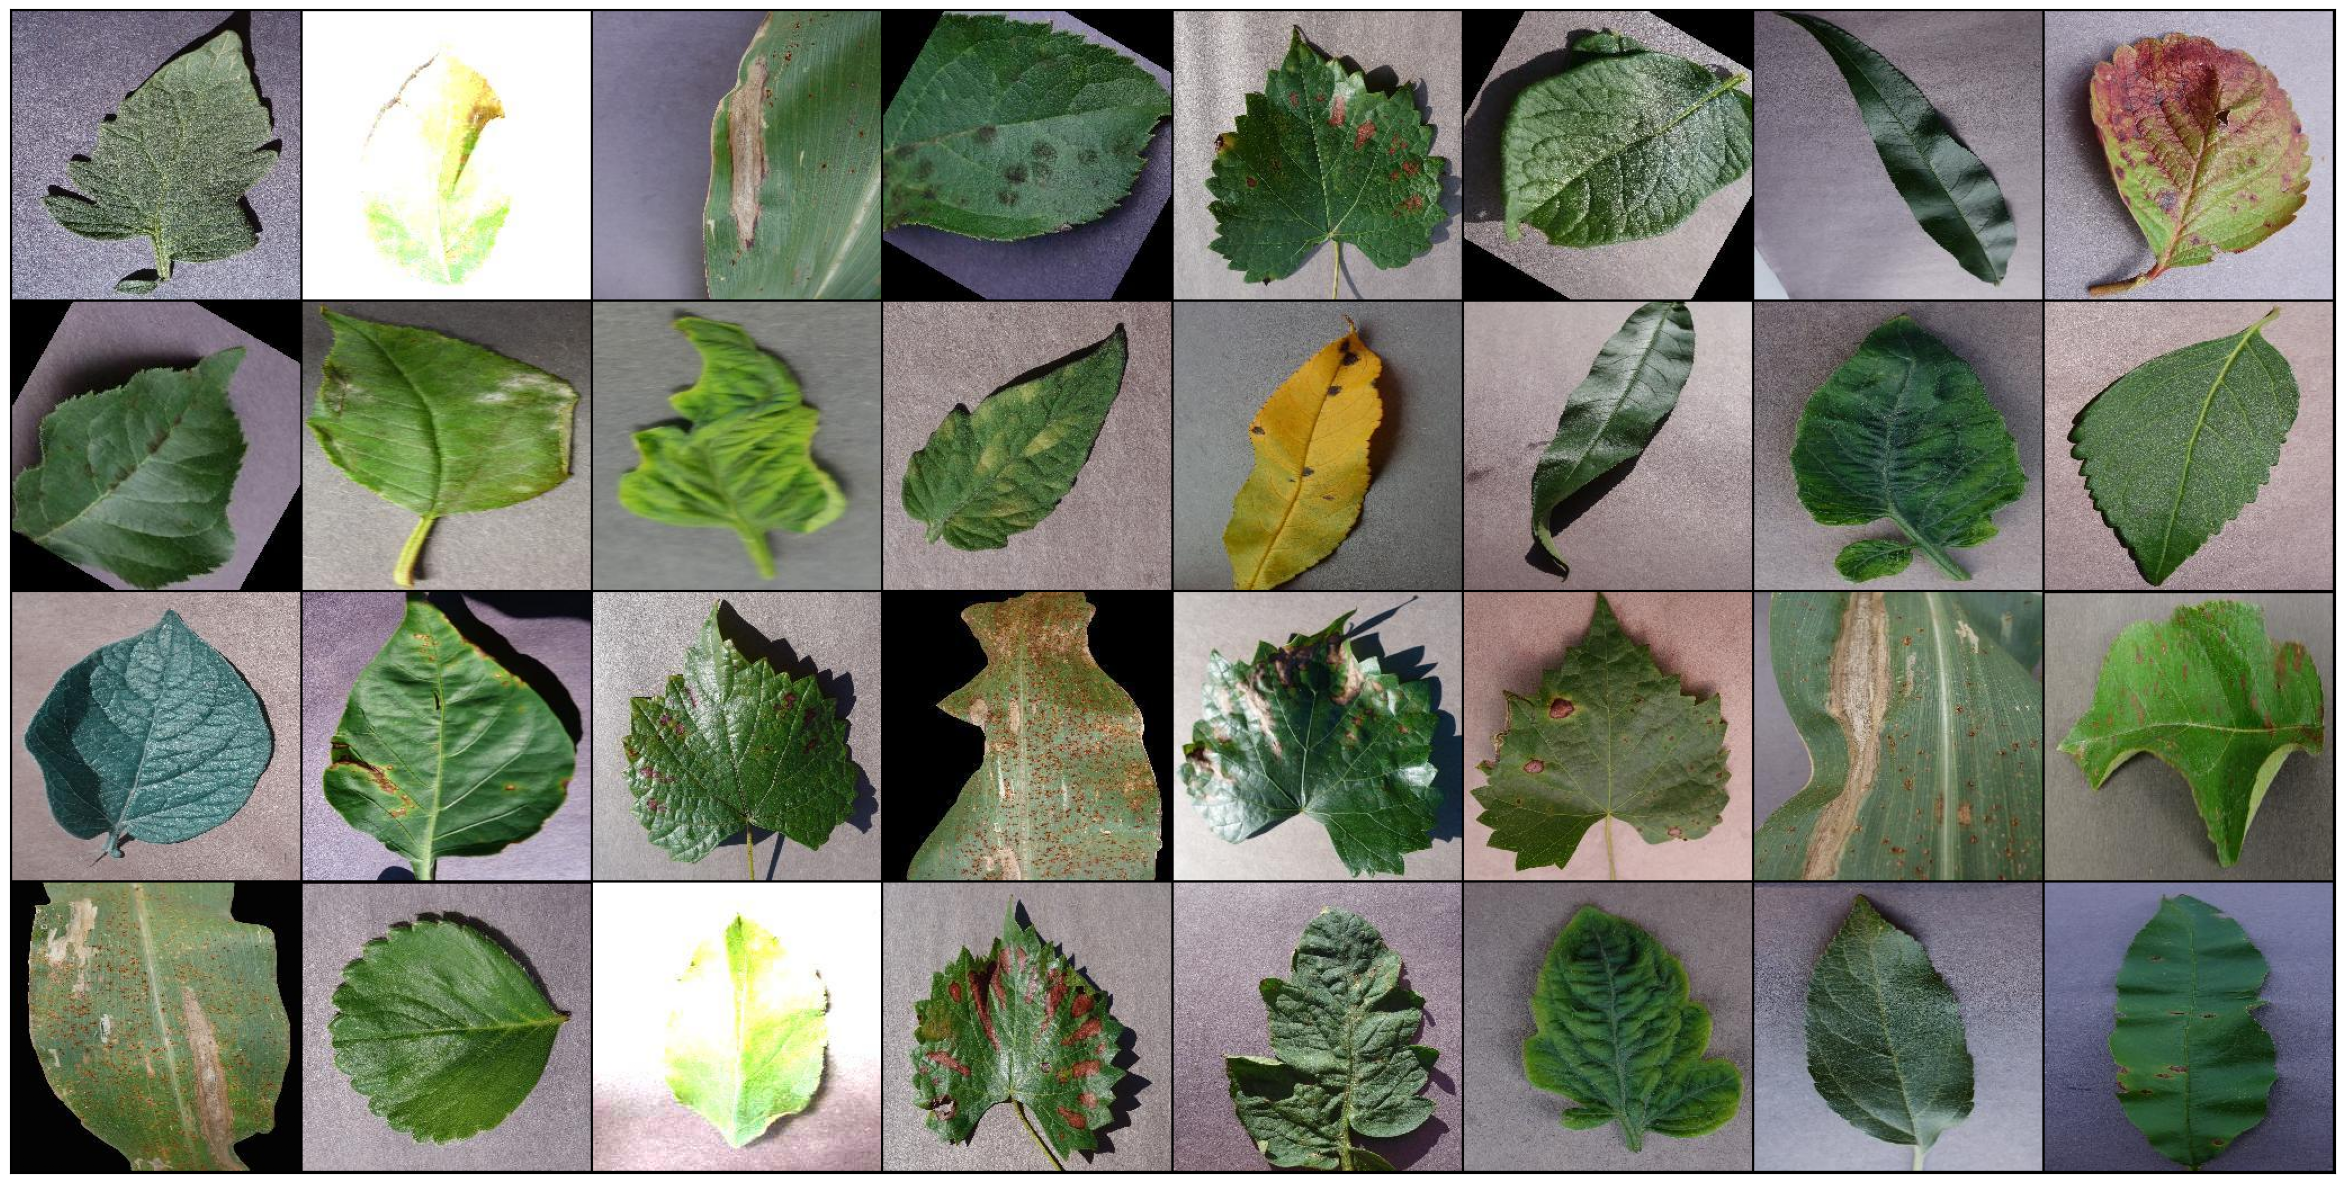

In [28]:
# Images for first batch of training
show_batch(train_dl) 

# 🏗️ Modelling 🏗️

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Define transforms and datasets
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder(r"C:\Users\hp\Downloads\combined_dataset\train_squared", transform=transform)
valid_dataset = ImageFolder(r"C:\Users\hp\Downloads\combined_dataset\valid", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

# Load pre-trained ResNet model
model = models.resnet50(pretrained=True)

# Modify last layers
num_classes = len(train_dataset.classes)
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, num_classes)
)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f}")
    
    # Validation
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f"Validation Accuracy: {accuracy:.2f}%")
    
    # Save model after each epoch
    torch.save(model.state_dict(), f"resnet_model_epoch_{epoch+1}.pth")

print("Training finished.")

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\hp/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [05:41<00:00, 300kB/s]   


KeyboardInterrupt: 

## testing

In [ ]:
test_dir = "../input/new-plant-diseases-dataset/test"
test = ImageFolder(test_dir, transform=transforms.ToTensor())

In [ ]:
test_images = sorted(os.listdir(test_dir + '/test')) # since images in test folder are in alphabetical order
test_images

In [ ]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

In [ ]:
# predicting first image
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [ ]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))

**We can see that the model predicted all the test images perfectly!!!!**

# Saving the model

**There are several ways to save the model in Pytorch, following are the two most common ways**

1. **Save/Load `state_dict` (Recommended)**

When saving a model for inference, it is only necessary to save the trained model’s learned parameters. Saving the model’s `state_dict` with the `torch.save()` function will give you the most flexibility for restoring the model later, which is why it is the recommended method for saving models.

A common PyTorch convention is to save models using either a `.pt` or `.pth` file extension.

Remember that you must call `model.eval()` to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

In [ ]:
# saving to the kaggle working directory
PATH = './plant-disease-model.pth'  
torch.save(model.state_dict(), PATH)

2. **Save/Load Entire Model**

This save/load process uses the most intuitive syntax and involves the least amount of code. Saving a model in this way will save the entire module using Python’s [pickle](https://docs.python.org/3/library/pickle.html) module. The disadvantage of this approach is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved. The reason for this is because pickle does not save the model class itself. Rather, it saves a path to the file containing the class, which is used during load time. Because of this, your code can break in various ways when used in other projects or after refactors.

In [ ]:
# saving the entire model to working directory
PATH = './plant-disease-model-complete.pth'
torch.save(model, PATH)